# Cx1015 Lab Quiz : Solution

---

## Context

**Story.** It is quite an important problem in practice to identify “Genuine” bank notes. One may look at the problem from the point of view of binary classification in data science or machine learning, where the target is to classify bank notes into two categories – “Genuine” and “Forged”. You are given a dataset on bank notes for such a classification problem. Please download the `quizData.csv` file posted corresponding to this Lab Quiz. The problems are all based on this dataset.

**Data.** The data has been generated by taking a collection of bank notes (both Genuine and Forged) as images, performing wavelet transform on the individual images, and then extracting some statistical features from the wavelet transforms. The resulting features are – Variance, Skewness, Kurtosis of the wavelet transformed images, as well as the Entropy of the bank note’s image. Each feature is “numeric”, while the response variable Banknote is “categorical” with two levels.

**To Do.** The goal is to connect the four variables Variance, Skewness, Kurtosis, Entropy to predict the response variable Banknote (Genuine/Forged) using a Decision Tree Classifier. In the process, you will also have to do statistical analysis, exploratory data analysis, and other relevant tasks. Plot figures and print outputs as you usually do in a Jupyter Notebook while doing exploratory analysis. If you are supposed to “Comment” something, use the Markdown cells in the notebook.

---
## Setup and Data Import

Import the basic libraries in Python.   

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Import the ML libraries from Scikit-Learn.     

In [2]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

Import the dataset `quizData.csv` as Dataframe.     

In [3]:
quizData = pd.read_csv('quizData.csv')

In [4]:
quizData.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


In [5]:
quizData.shape

(1000, 5)

In [6]:
quizData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1000 non-null   float64
 1   Skewness  1000 non-null   float64
 2   Kurtosis  1000 non-null   float64
 3   Entropy   1000 non-null   float64
 4   Banknote  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


---

## Problem 1 : Exploratory Analysis

**(a) Print the statistical description of the predictor variables in the data and plot standard statistical distributions for each of the predictor variables. The predictors Variance, Skewness, Kurtosis, Entropy are all “numeric”.**

In [7]:
quizData.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


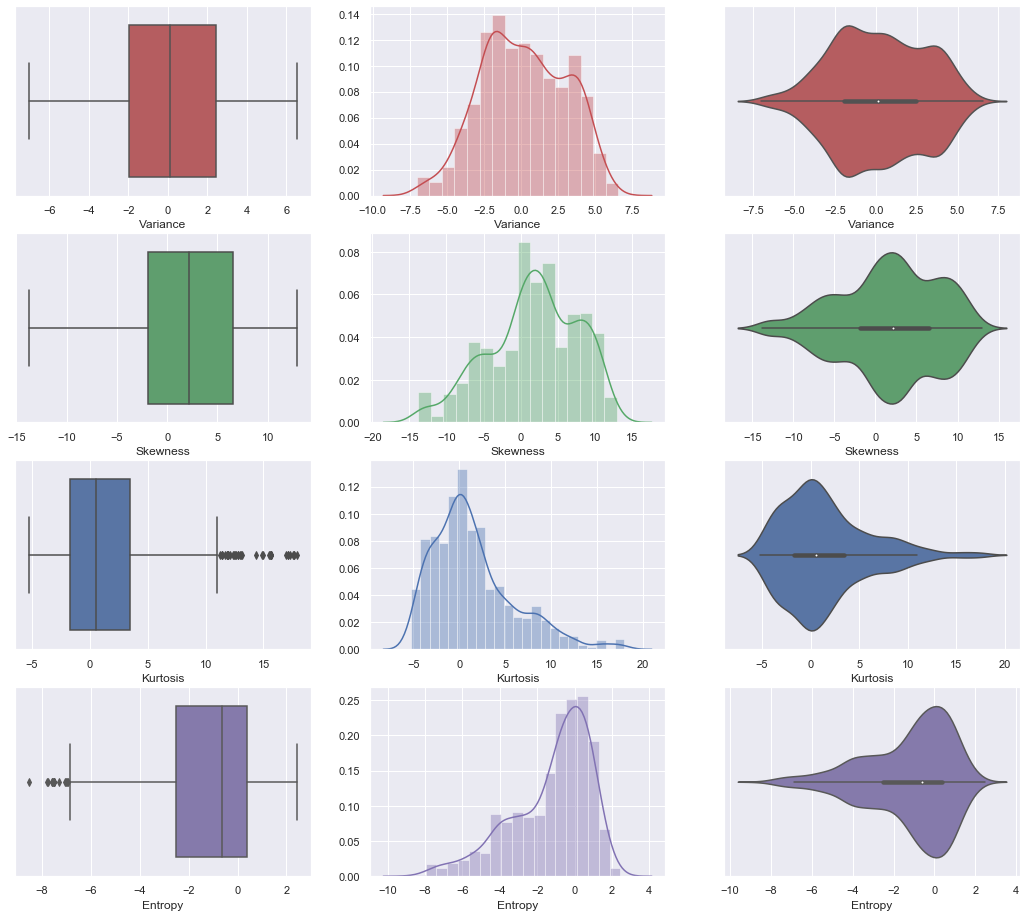

In [8]:
# Extract the numeric predictor variables
quizDataPredictors = quizData[["Variance","Skewness","Kurtosis","Entropy"]]

# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 16))
colors = ["r", "g", "b", "m"]

count = 0
for var in quizDataPredictors:
    sb.boxplot(quizDataPredictors[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(quizDataPredictors[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(quizDataPredictors[var], color = colors[count], ax = axes[count,2])
    count += 1

**(b) Comment : Which numeric variable has the most number of outliers? Exactly how many outliers does this variable have, if we consider the points outside the range [Q1 – 1.5 * (Q3 – Q1), Q3 + 1.5 * (Q3 – Q1)] to be the outliers?**

**Answer (case one) : As per the boxplots, it seems that `Kurtosis` has the most number of outliers.**

Counting the outliers of the guess, in case the first answer was a guess.

In [9]:
# Choose the variable
var = quizData["Kurtosis"]

# Calculate the quartiles
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)

# Rule to identify outliers
rule = ((var < (Q1 - 1.5 * (Q3 - Q1))) | (var > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

37

**Answer (case two) : Let us count the outliers for all variables, and then find the maximum.**

Counting the outliers of all variables, and then finding the maximum.

In [10]:
# Extract all numeric predictor variables
quizDataPredictors = quizData[["Variance","Skewness","Kurtosis","Entropy"]]

# Calculate the quartiles
Q1 = quizDataPredictors.quantile(0.25)
Q3 = quizDataPredictors.quantile(0.75)

# Rule to identify outliers
rule = ((quizDataPredictors < (Q1 - 1.5 * (Q3 - Q1))) | (quizDataPredictors > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

Variance     0
Skewness     0
Kurtosis    37
Entropy     16
dtype: int64

**Answer (case two) : As per the counts, it seems that `Kurtosis` has the most number of outliers = 37.**

**(c) Print the statistical description and plot standard statistical distributions for the response variable – Banknote.**

In [11]:
quizData['Banknote'].describe()

count       1000
unique         2
top       Forged
freq         500
Name: Banknote, dtype: object

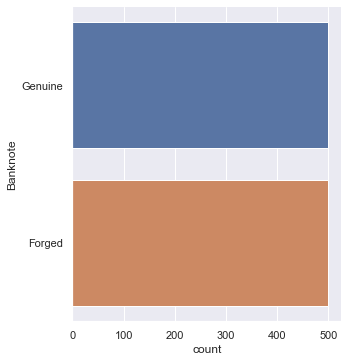

In [12]:
sb.catplot(y = 'Banknote', data = quizData, kind = "count")

**(d) Write a small piece of code to print the exact ratio (“Genuine” : “Forged”) in the response variable Banknote.**

In [13]:
# Choose the variable
var = quizData["Banknote"]

# Print the ratio (style 1)
print("Style 1 \t", (var == "Genuine").sum(), ":", (var == "Forged").sum())

# Print the ratio (style 2)
print("Style 2 \t", (var == "Genuine").sum() / (var == "Forged").sum())

# Print the ratio (style 3)
print("Style 3 \t", (var == "Genuine").sum() / (var == "Forged").sum(), ":", 1)

Style 1 	 500 : 500
Style 2 	 1.0
Style 3 	 1.0 : 1


**(e) Visualize the relationship of response variable Banknote with the numeric predictor variables using swarmplots.**

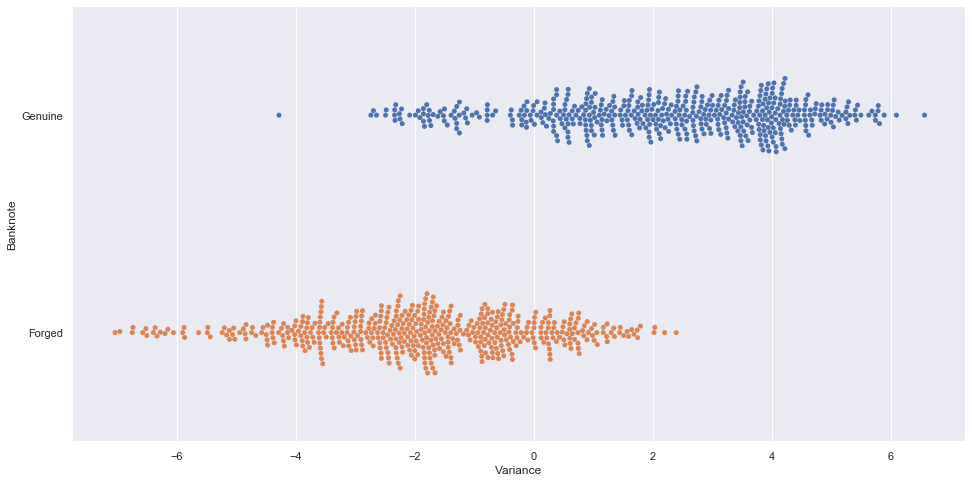

In [14]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Variance', y = 'Banknote', data = quizData)

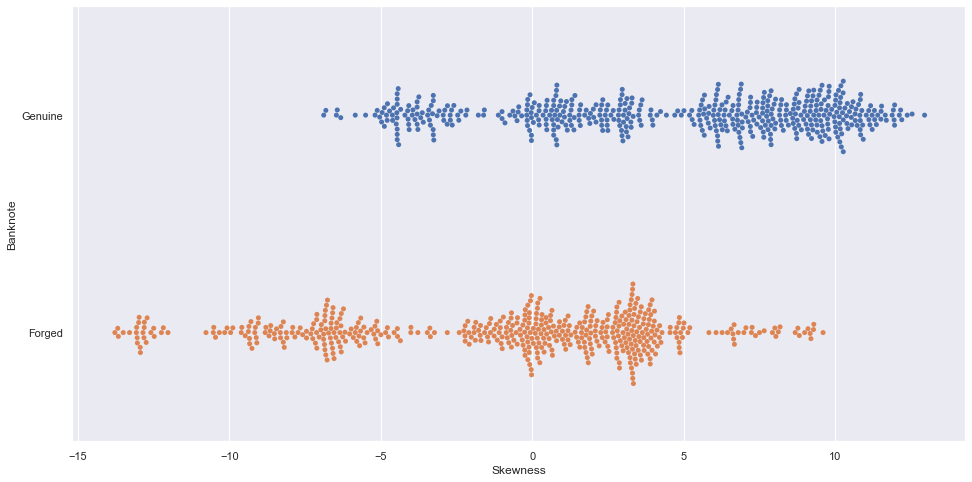

In [15]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Skewness', y = 'Banknote', data = quizData)

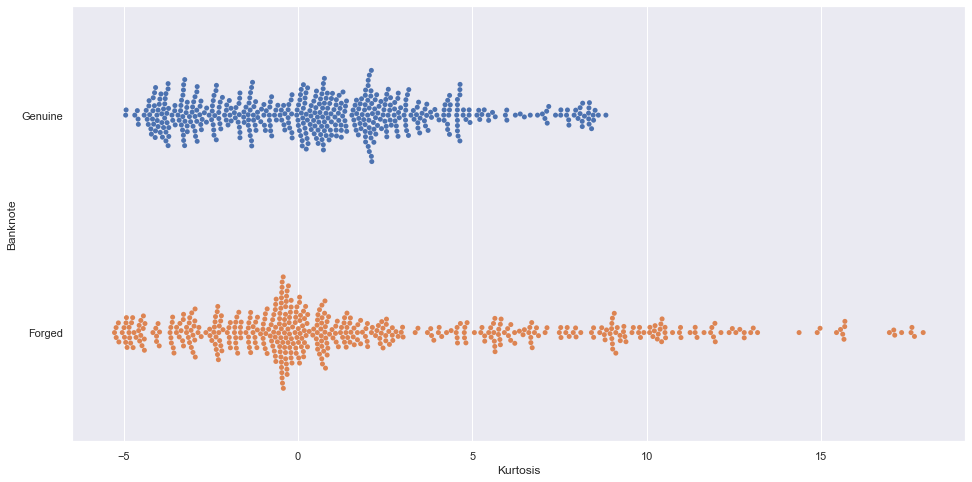

In [16]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Kurtosis', y = 'Banknote', data = quizData)

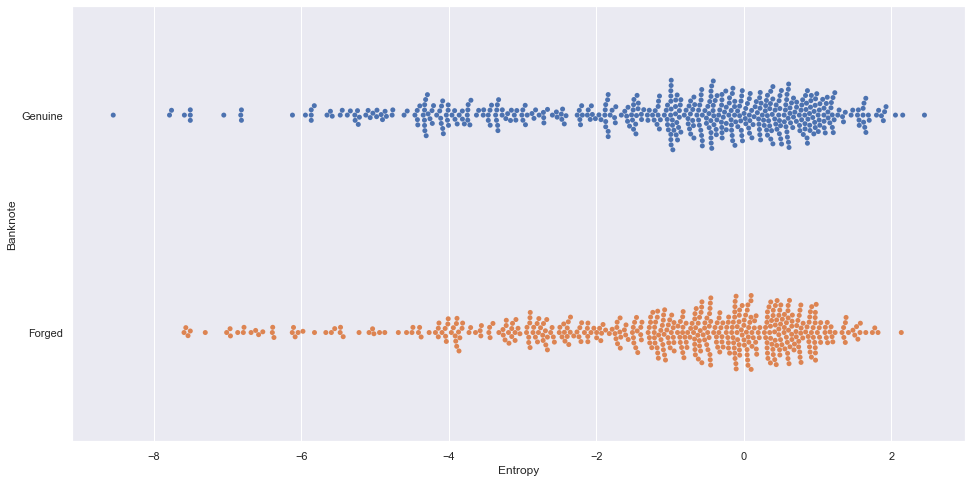

In [17]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'Entropy', y = 'Banknote', data = quizData)

---

## Problem 2 : Uni-Variate Decision Tree

**(a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test. On the Train set, fit four uni-variate Decision Tree models for Banknote against each of the four numeric predictor variables – Variance, Skewness, Kurtosis, Entropy. In each case, do not fit a decision tree more than depth 4 (may overfit otherwise).**

**(b) Predict Banknote using each of the four models on both Train and Test data. Show the Confusion Matrix for each model, both for Train and Test datasets. Print the Classification Accuracy for the tree models, on both datasets.**

Classification Accuracy 	 Train : 0.86625
Classification Accuracy 	 Test  : 0.855



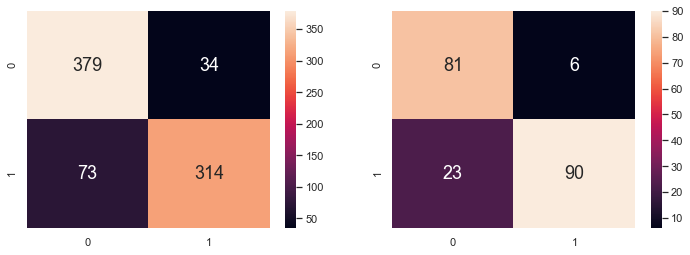

In [18]:
# Part (a)

# Extract Response and Predictors
y = pd.DataFrame(quizData["Banknote"])
X = pd.DataFrame(quizData["Variance"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model



# Part (b)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Accuracy (on Train and Test)
print("Classification Accuracy \t Train :", dectree.score(X_train, y_train))
print("Classification Accuracy \t Test  :", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy 	 Train : 0.79875
Classification Accuracy 	 Test  : 0.76



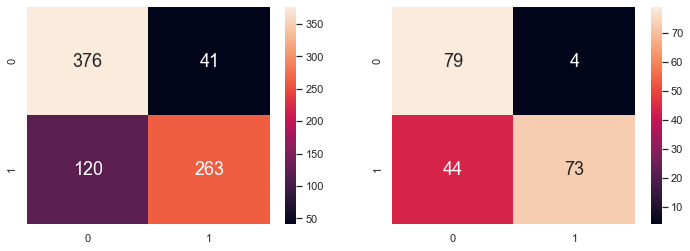

In [19]:
# Part (a)

# Extract Response and Predictors
y = pd.DataFrame(quizData["Banknote"])
X = pd.DataFrame(quizData["Skewness"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model



# Part (b)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Accuracy (on Train and Test)
print("Classification Accuracy \t Train :", dectree.score(X_train, y_train))
print("Classification Accuracy \t Test  :", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy 	 Train : 0.6575
Classification Accuracy 	 Test  : 0.59



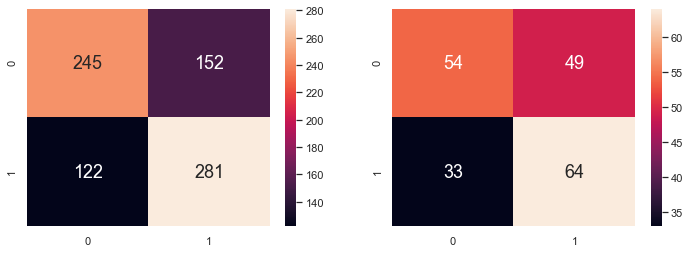

In [20]:
# Part (a)

# Extract Response and Predictors
y = pd.DataFrame(quizData["Banknote"])
X = pd.DataFrame(quizData["Kurtosis"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model



# Part (b)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Accuracy (on Train and Test)
print("Classification Accuracy \t Train :", dectree.score(X_train, y_train))
print("Classification Accuracy \t Test  :", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Classification Accuracy 	 Train : 0.555
Classification Accuracy 	 Test  : 0.55



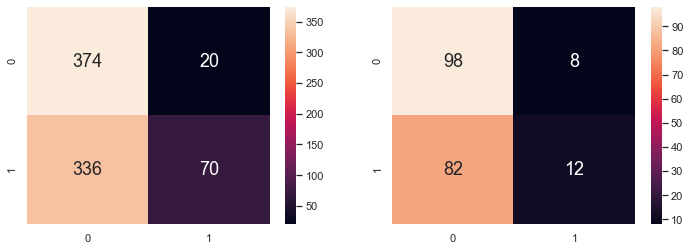

In [21]:
# Part (a)

# Extract Response and Predictors
y = pd.DataFrame(quizData["Banknote"])
X = pd.DataFrame(quizData["Entropy"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model



# Part (b)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Accuracy (on Train and Test)
print("Classification Accuracy \t Train :", dectree.score(X_train, y_train))
print("Classification Accuracy \t Test  :", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**(c) Comment : Which of the four uni-variate Decision Trees is the best in terms of predicting Banknote? Justify.**

**Answer : As per classification accuracy, the first tree, based on `Variance`, is the best one. It has a very high classification accuracy both in Train and Test datasets. In fact, it is the best in terms of False Positives and False Negatives too, as it has the lowest FPR and FNR out of all the trees, and seems to be most balanced.**

---

## Problem 3 : Multi-Variate Decision Tree

**(a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test (you may use the same partition as before, if you want). On the Train set, fit a single multi-variate Decision Tree model (max depth 4) for Banknote against all of the four other numeric predictor variables – Variance, Skewness, Kurtosis, Entropy.**

**(b) Predict Banknote using the tree model you fit on both Train and Test data. Show the Confusion Matrix on both Train and Test datasets. Print the Classification Accuracy for the tree model on both Train and Test datasets.**

Classification Accuracy 	 Train : 0.9675
Classification Accuracy 	 Test  : 0.95



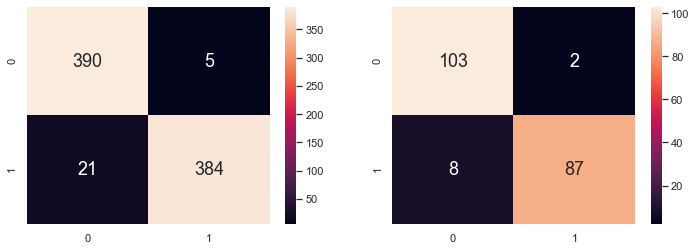

In [22]:
# Part (a)

# Extract Response and Predictors
y = pd.DataFrame(quizData["Banknote"])
X = pd.DataFrame(quizData[["Variance","Skewness","Kurtosis","Entropy"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model



# Part (b)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Accuracy (on Train and Test)
print("Classification Accuracy \t Train :", dectree.score(X_train, y_train))
print("Classification Accuracy \t Test  :", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**(c) Write a small piece of code to print the exact FPR and FNR values calculated from each of the confusion matrices. You may consider “Genuine” as Positive and “Forged” as Negative in this context and calculate accordingly.**

In [23]:
# False Positives : Forged (0) predicted Genuine (1)
cmTrain = confusion_matrix(y_train, y_train_pred)
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
print("FPR Train :\t", (fpTrain/(fpTrain + tnTrain)))

# False Negatives : Genuine (1) predicted Forged (0)
cmTrain = confusion_matrix(y_train, y_train_pred)
fnTrain = cmTrain[1][0]
tpTrain = cmTrain[1][1]
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))

# False Positives : Forged (0) predicted Genuine (1)
cmTest = confusion_matrix(y_test, y_test_pred)
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
print("FPR Test  :\t", (fpTest/(fpTest + tnTest)))

# False Negatives : Genuine (1) predicted Forged (0)
cmTest = confusion_matrix(y_test, y_test_pred)
fnTest = cmTest[1][0]
tpTest = cmTest[1][1]
print("FNR Test  :\t", (fnTest/(fnTest + tpTest)))

FPR Train :	 0.012658227848101266
FNR Train :	 0.05185185185185185
FPR Test  :	 0.01904761904761905
FNR Test  :	 0.08421052631578947


**(d) Print ONLY the False Positive cases (complete rows from the dataframe) in each of the Train and Test datasets. Print ONLY the False Negative cases (complete rows from the dataframe) in each of the Train and Test datasets.**

In [24]:
# False Positives : Forged (0) predicted Genuine (1)
X_values = X_train[(y_train == "Forged")["Banknote"] & (y_train_pred == "Genuine")]
y_values = y_train[(y_train == "Forged")["Banknote"] & (y_train_pred == "Genuine")]
jointDF = pd.concat([X_values,y_values], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Banknote
663,1.7425,3.68330,-4.0129,-1.720700,Forged
832,2.0177,1.79820,-2.9581,0.209900,Forged
838,1.4378,0.66837,-2.0267,1.027100,Forged
655,1.5631,0.89599,-1.9702,0.654720,Forged
649,2.0310,1.85200,-3.0121,0.003003,Forged


In [25]:
# False Positives : Forged (0) predicted Genuine (1)
X_values = X_test[(y_test == "Forged")["Banknote"] & (y_test_pred == "Genuine")]
y_values = y_test[(y_test == "Forged")["Banknote"] & (y_test_pred == "Genuine")]
jointDF = pd.concat([X_values,y_values], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Banknote
709,0.00312,-4.0061,1.79560,0.91722,Forged
529,-4.47790,7.3708,-0.31218,-6.77540,Forged


In [26]:
# False Negatives : Genuine (1) predicted Forged (0)
X_values = X_train[(y_train == "Genuine")["Banknote"] & (y_train_pred == "Forged")]
y_values = y_train[(y_train == "Genuine")["Banknote"] & (y_train_pred == "Forged")]
jointDF = pd.concat([X_values,y_values], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Banknote
418,-1.257600,1.589200,7.0078,0.424550,Genuine
296,0.051979,7.052100,-2.0541,-3.150800,Genuine
226,0.570600,-0.024800,1.2421,-0.562100,Genuine
397,-0.398160,5.978100,1.3912,-1.162100,Genuine
248,0.379800,0.709800,0.7572,-0.444400,Genuine
436,0.379800,0.709800,0.7572,-0.444400,Genuine
478,-1.778100,0.854600,7.1303,0.027572,Genuine
123,-1.507500,1.922400,7.1466,0.891360,Genuine
224,-0.360380,4.115800,3.1143,-0.371990,Genuine
90,1.480600,7.637700,-2.7876,-1.034100,Genuine


In [27]:
# False Negatives : Genuine (1) predicted Forged (0)
X_values = X_test[(y_test == "Genuine")["Banknote"] & (y_test_pred == "Forged")]
y_values = y_test[(y_test == "Genuine")["Banknote"] & (y_test_pred == "Forged")]
jointDF = pd.concat([X_values,y_values], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Banknote
278,0.89566,7.7763,-2.7473,-1.93530,Genuine
498,0.57060,-0.0248,1.2421,-0.56210,Genuine
172,-1.69520,1.0657,8.8294,0.94955,Genuine
437,0.54150,6.0319,1.6825,-0.46122,Genuine
421,-1.14970,1.2954,7.7010,0.62627,Genuine
404,0.37980,0.7098,0.7572,-0.44440,Genuine
169,0.11739,6.2761,-1.5495,-2.47460,Genuine
409,0.64295,7.1018,0.3493,-0.41337,Genuine


**(e) Predict the category of bank note (Genuine/Forged) for the following data points using the tree model you fit.**

**{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}**     
**{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544}**    
**{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}**     
**{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}**     
**{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}**

In [28]:
# Create a list from the given data points
predList = [{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}, 
{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544},
{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173},
{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418},
{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}]

# Convert the list to dataframe
predData = pd.DataFrame(predList)
predData

,Variance,Skewness,Kurtosis,Entropy
0,-4.94470,3.30050,1.0630,-1.44400
1,0.94225,5.85610,1.8762,-0.32544
2,2.24290,-4.14270,5.2333,-0.40173
3,0.53936,3.89440,-4.8166,-4.34180
4,-2.57240,-0.95602,2.7073,-0.16639


In [29]:
# Predict response for the points
y_pred = dectree.predict(predData)

# Concatenate with the given data
y_pred = pd.DataFrame(y_pred, columns = ["Predicted"], index = predData.index)
jointDF = pd.concat([predData,y_pred], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Predicted
0,-4.94470,3.30050,1.0630,-1.44400,Forged
1,0.94225,5.85610,1.8762,-0.32544,Genuine
2,2.24290,-4.14270,5.2333,-0.40173,Genuine
3,0.53936,3.89440,-4.8166,-4.34180,Forged
4,-2.57240,-0.95602,2.7073,-0.16639,Forged


Bonus : Predict the probabilities in addition to the classes.

In [30]:
# Predict response for the points
y_prob = dectree.predict_proba(predData)

# Concatenate with the given data
y_prob = pd.DataFrame(y_prob, columns = ["Prob(Forged)","Prob(Genuine)"], index = predData.index)
jointDF = pd.concat([predData,y_prob,y_pred], axis = 1)
jointDF

,Variance,Skewness,Kurtosis,Entropy,Prob(Forged),Prob(Genuine),Predicted
0,-4.94470,3.30050,1.0630,-1.44400,1.000000,0.000000,Forged
1,0.94225,5.85610,1.8762,-0.32544,0.046512,0.953488,Genuine
2,2.24290,-4.14270,5.2333,-0.40173,0.000000,1.000000,Genuine
3,0.53936,3.89440,-4.8166,-4.34180,0.859649,0.140351,Forged
4,-2.57240,-0.95602,2.7073,-0.16639,1.000000,0.000000,Forged
